In [1]:
from transformers import AutoModel
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import torch
import json

In [2]:
models_default = [
    ("bert-base-cased", ["mean"], 13, 
         [
            ("test_results", "BERT$_{base}$ cased"),
         ]
    ),
    ("google-electra-base-discriminator", ["mean"], 13, 
         [
            ("test_results", "ELECTRA$_{base}$ discriminator"),
         ]
    ),
    ("google-electra-base-generator", ["mean"], 13, 
         [
            ("test_results", "ELECTRA$_{base}$ generator"),
         ]
    )
]

models_wordsim = [
    ("bert-base-cased", ["mean"], 13, 
         [
            ("test_results_word_similarity", "BERT$_{base}$ cased"),
         ]
    ),
    ("google-electra-base-discriminator", ["mean"], 13, 
         [
            ("test_results_word_similarity", "ELECTRA$_{base}$ discriminator"),
         ]
    ),
    ("google-electra-base-generator", ["mean"], 13, 
         [
            ("test_results_word_similarity", "ELECTRA$_{base}$ generator"),
         ]
    )
]


models_mlm = [
    ("bert-base-cased", ["mean"], 13, 
         [
            ("test_results_bert-base-cased_model_epoch_9_mlm", "BERT$_{base}$ cased"),
         ]
    ),
    ("google-electra-base-discriminator", ["mean"], 13, 
         [
            ("test_results_google-electra-base-discriminator_model_epoch_9_mlm", "ELECTRA$_{base}$ discriminator"),
         ]
    ),
    ("google-electra-base-generator", ["mean"], 13, 
         [
            ("test_results_google-electra-base-generator_model_epoch_9_mlm", "ELECTRA$_{base}$ generator"),
         ]
    )
]

models = [
    models_default, models_wordsim, models_mlm
]
colors=[
    [None, None, None]  for i in range(3)
]

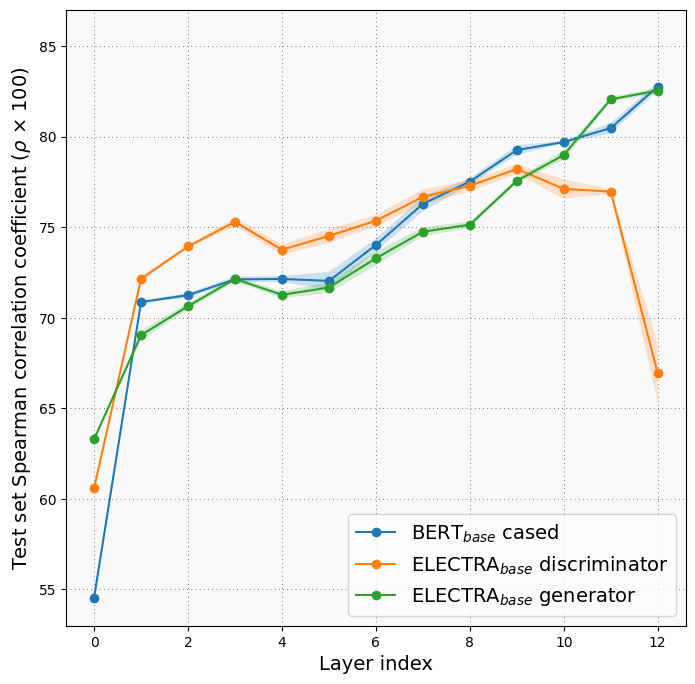

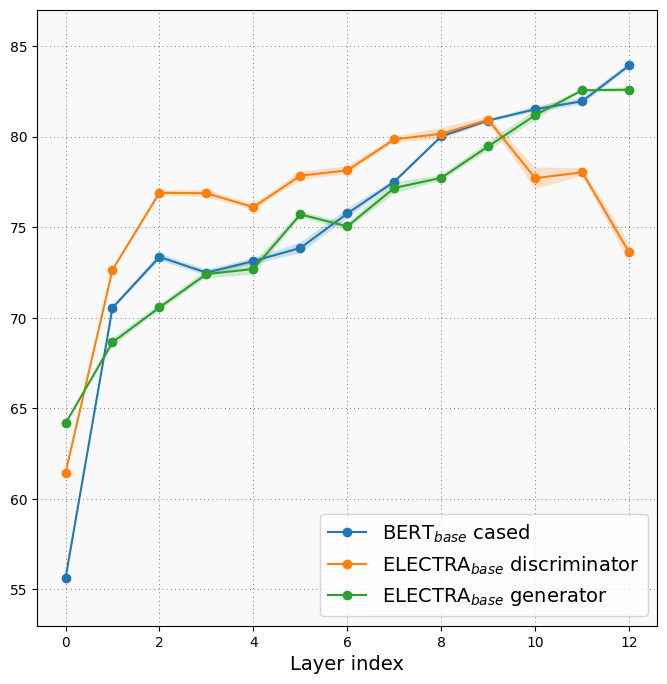

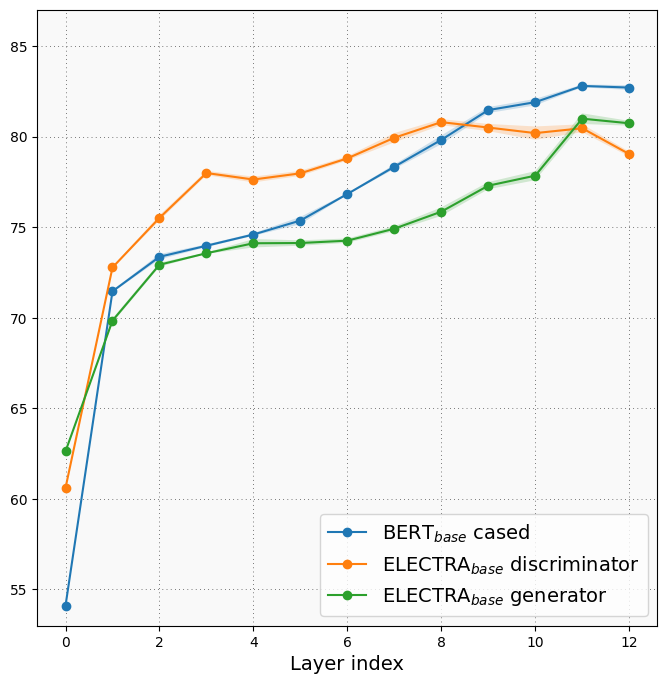

In [3]:
def add_to_plot(models, colors, ax, plot_idx, ylim_spearman=[53, 87]):
    ax.set_facecolor("#F9F9F9")
    ax.grid(color='black', linestyle=(0, (1, 5)), linewidth=0.5)
    for x, color in zip(models, colors):
        m = x[0]
        pool = x[1]
        c = x[2]
        json_names_labels = x[3]
        for p in pool:
            for (name, label) in json_names_labels:
                spearman, pearson = [], []
                std_spearman, std_pearson = [], []
                for i in range(c):
                    res = json.load(open(f"../output/{m}/{p}/{i}_to_{i+1}/{name}.json"))
                    
                    std_1 = np.array(res["stdev_cosine_spearman_test"]) * 100
                    mean_1 = res["mean_cosine_spearman_test"] * 100
                    std_spearman.append((mean_1-std_1, mean_1+std_1))
                    spearman.append(mean_1)

                    std_2 = np.array(res["stdev_cosine_pearson_test"]) * 100
                    mean_2 = res["mean_cosine_pearson_test"] * 100
                    std_pearson.append((mean_2-std_2, mean_2+std_2))
                    pearson.append(mean_2)

                ax.plot(spearman, "-o", label=label)
                ax.fill_between(
                    np.array(list(range(c))), 
                    np.array(std_spearman)[:,0], 
                    np.array(std_spearman)[:,1],
                    alpha=0.2
                )
                ax.set_xlabel("Layer index", fontsize=14)
                if plot_idx == 0:
                    ax.set_ylabel("Test set Spearman correlation coefficient ($\\rho$ $\\times$ 100)", fontsize=14)
                else:
                    ax.set_ylabel("", fontsize=14)
                ax.legend(loc="lower right", fontsize=14)
                if ylim_spearman is not None:
                    ax.set_ylim(ylim_spearman)

                    
names = [
    "./plots/comparison_plot.pdf",
    "./plots/comparison_plot_wordsim.pdf",
    "./plots/comparison_plot_mlm.pdf",
]

for i in range(len(names)):
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))
    for m, c, ax in zip([models[i]], [colors[i]], [axs]):
        add_to_plot(m, c, ax, i)
    plt.savefig(names[i], format="pdf", bbox_inches="tight", dpi=300)



 17%|███████▌                                     | 1/6 [00:00<00:01,  3.90it/s]

[[ 54.54545986  22.66521645]
 [ 70.86418009  29.753088  ]
 [ 71.24643613  36.84096146]
 [ 72.11725551  43.92883301]
 [ 72.14341732  51.01670456]
 [ 72.03149965  58.10457611]
 [ 74.0127931   65.19245148]
 [ 76.28244008  72.28031921]
 [ 77.51704605  79.36819458]
 [ 79.25429827  86.45606232]
 [ 79.69653372  93.54393768]
 [ 80.46990322 100.63180542]
 [ 82.75865238 107.71968079]] 

 [[0.68696087 0.7985203  0.79141726 0.79521865 0.78772937 0.79398804
  0.79972109 0.81688251 0.82397105 0.83039057 0.8244004  0.83537313
  0.86041772]]

            BERT$_{base}$ - percentage between 12 and 12 state - -0.0
            


 33%|███████████████                              | 2/6 [00:00<00:01,  2.71it/s]

[[ 58.39214096  30.22028732]
 [ 71.98253397  42.81651306]
 [ 71.93791952  55.41273499]
 [ 71.36094607  68.00895691]
 [ 70.66510212  80.60518646]
 [ 70.31628237  93.20140839]
 [ 71.97238215 105.79763031]
 [ 73.46219137 118.39385223]
 [ 73.62737321 130.99008179]
 [ 74.13314687 143.58630371]
 [ 73.75696247 156.18252563]
 [ 72.76688482 168.77874756]
 [ 73.05199322 181.37496948]
 [ 72.78687769 193.97120667]
 [ 74.2922826  206.56742859]
 [ 75.58989748 219.16365051]
 [ 76.86622433 231.75987244]
 [ 81.86251894 244.35609436]
 [ 82.25015377 256.95233154]
 [ 82.47756753 269.54855347]
 [ 83.33519866 282.14477539]
 [ 83.5047581  294.74099731]
 [ 83.48419422 307.33721924]
 [ 84.08150762 319.93344116]
 [ 85.57818111 332.52966309]] 

 [[0.7195462  0.81820569 0.79463899 0.78868893 0.7876526  0.7861548
  0.78192856 0.7777862  0.78739757 0.78822848 0.7865467  0.78738497
  0.78301378 0.77340969 0.78087695 0.78460142 0.80236776 0.84967985
  0.85020946 0.84934488 0.85590023 0.85162883 0.85959339 0.86623952


 67%|██████████████████████████████               | 4/6 [00:01<00:00,  3.66it/s]

[[54.96807703 15.89145565]
 [71.07486799 19.04384041]
 [72.09170041 22.19622421]
 [72.92057546 25.34860802]
 [74.34180836 28.50099182]
 [75.47544894 31.65337563]
 [76.82503005 34.80575943]
 [79.73292671 37.95814514]
 [80.83762329 41.11052704]] 

 [[0.679047   0.8028755  0.81059673 0.80985969 0.81363415 0.8098864
  0.82552683 0.85078611 0.85719118]]

            BERT$_{medium}$ - percentage between 8 and 8 state - -0.0
            
[[55.57744001 15.89145565]
 [71.83428787 19.04384041]
 [75.15978268 22.19622421]
 [76.82423565 25.34860802]
 [79.31579976 28.50099182]] 

 [[0.68803218 0.81069467 0.82199095 0.81788962 0.8512301 ]]

            BERT$_{small}$ - percentage between 4 and 4 state - -0.0
            


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  4.03it/s]


[[45.39382971  3.97286391]
 [65.98789322  4.1711359 ]
 [69.71409038  4.36940813]] 

 [[0.59973848 0.77167001 0.78228767]]

            BERT$_{tiny}$ - percentage between 2 and 2 state - -0.0
            
[[50.9764214   7.94572783]
 [69.28260146  8.73548794]
 [70.67188795  9.52524757]
 [74.15308922 10.31500816]
 [75.6383586  11.1047678 ]] 

 [[0.65586577 0.80154921 0.80405178 0.81337834 0.83095453]]

            BERT$_{mini}$ - percentage between 4 and 4 state - -0.0
            


 33%|███████████████                              | 1/3 [00:00<00:00,  5.36it/s]

[[57.43883809  3.97286391]
 [68.82006465  4.76262379]
 [67.3684762   5.5523839 ]
 [66.90593702  6.34214401]
 [66.12778051  7.13190413]
 [65.65112126  7.92166424]
 [68.2234406   8.71142387]
 [71.11818996  9.50118446]
 [72.60386945 10.2909441 ]
 [69.94154661 11.08070374]
 [67.73841422 11.87046432]
 [66.53505864 12.66022396]
 [66.53504195 13.4499836 ]] 

 [[0.72519753 0.79721702 0.77249214 0.76985768 0.76273432 0.75345851
  0.77365599 0.77828045 0.77551774 0.75280104 0.74328284 0.73921766
  0.7402277 ]]

            ELECTRA$_{D\:small}$ - percentage between 1 and 12 state - 0.6459011435508728
            


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  3.05it/s]

[[ 60.58904779  23.83718491]
 [ 72.14394409  30.92505646]
 [ 73.93292089  38.01292801]
 [ 75.29295531  45.10079956]
 [ 73.75296466  52.18867111]
 [ 74.51520138  59.27654266]
 [ 75.35332624  66.36441803]
 [ 76.67177955  73.45228577]
 [ 77.28170056  80.54016113]
 [ 78.21053698  87.62802887]
 [ 77.1116881   94.71590424]
 [ 76.96192373 101.8037796 ]
 [ 66.92876519 108.89164734]] 

 [[0.73746208 0.81541473 0.81386139 0.8213577  0.8056023  0.80404718
  0.8117918  0.81369864 0.81354723 0.81161398 0.80547713 0.80179636
  0.72320161]]

            ELECTRA$_{D\:base}$ - percentage between 3 and 12 state - 0.5858194828033447
            


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.62it/s]


[[ 62.2776781   31.7829113 ]
 [ 73.42620884  44.37913513]
 [ 73.39014574  56.97536087]
 [ 76.28861001  69.57158661]
 [ 75.25692106  82.16780853]
 [ 76.37337202  94.76403046]
 [ 77.54346417 107.36025238]
 [ 79.56774344 119.95648193]
 [ 79.28861124 132.55270386]
 [ 78.65854363 145.14892578]
 [ 77.96674332 157.74514771]
 [ 79.03253969 170.34136963]
 [ 80.53574376 182.93760681]
 [ 70.16025643 195.53382874]
 [ 66.94039175 208.13005066]
 [ 73.94345768 220.72627258]
 [ 54.24468879 233.32249451]
 [ 81.08273278 245.91871643]
 [ 54.01764224 258.51495361]
 [ 67.84121083 271.11117554]
 [ 32.90739765 283.70739746]
 [ 38.48321307 296.30361938]
 [ 23.00610434 308.89984131]
 [ 45.13906539 321.49606323]
 [ 35.53141879 334.09228516]] 

 [[0.73719048 0.81345889 0.82300944 0.83189018 0.81346896 0.81445781
  0.82597165 0.84215512 0.83542471 0.82639815 0.82130334 0.82682706
  0.84360086 0.75150718 0.68238232 0.77559029 0.57054763 0.83260448
  0.55985607 0.69957988 0.34893557 0.41226059 0.28938404 0.48228745

 33%|███████████████                              | 1/3 [00:00<00:00,  4.07it/s]

[[57.01230124  3.97286391]
 [68.57674981  4.76262379]
 [69.2257483   5.5523839 ]
 [69.89787943  6.34214401]
 [70.0688304   7.13190413]
 [69.77972983  7.92166424]
 [71.35524548  8.71142387]
 [71.77527831  9.50118446]
 [72.21484604 10.2909441 ]
 [74.73025989 11.08070374]
 [77.63672696 11.87046432]
 [79.74264776 12.66022396]
 [81.79286008 13.4499836 ]] 

 [[0.72298075 0.78899265 0.77159254 0.77357068 0.77348692 0.76815664
  0.77618422 0.77762526 0.77807241 0.79407749 0.80862629 0.82850529
  0.84665863]]

            ELECTRA$_{G\:small}$ - percentage between 12 and 12 state - -0.0
            


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  4.40it/s]

[[63.29926293 23.83718491]
 [69.03893919 24.62694359]
 [70.63619132 25.41670418]
 [72.13546725 26.20646477]
 [71.26694381 26.99622345]
 [71.66776409 27.78598404]
 [73.27999657 28.57574463]
 [74.74788521 29.36550331]
 [75.13312138 30.1552639 ]
 [77.55653819 30.94502449]
 [78.98227535 31.73478317]
 [82.05419617 32.52454376]
 [82.53840744 33.31430435]] 

 [[0.76328452 0.7847389  0.8038114  0.80147927 0.77942605 0.7863349
  0.79624861 0.80379893 0.80852391 0.82439135 0.83423228 0.86194318
  0.86602781]]

            ELECTRA$_{G\:base}$ - percentage between 12 and 12 state - -0.0
            


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.94it/s]

[[64.59983505 31.7829113 ]
 [68.7842537  32.5726738 ]
 [69.44545136 33.36243057]
 [70.39756125 34.15219116]
 [72.64126433 34.94195175]
 [73.29532682 35.73171234]
 [73.00494111 36.52147293]
 [73.64436707 37.31123352]
 [72.72598302 38.1009903 ]
 [73.14553349 38.89075089]
 [73.65926062 39.68051147]
 [73.45769841 40.47027206]
 [74.31081647 41.26003265]
 [73.26891427 42.04979324]
 [73.54248562 42.83955383]
 [74.80605288 43.62931061]
 [75.73587133 44.4190712 ]
 [76.68049964 45.20883179]
 [77.14894851 45.99859238]
 [77.76125451 46.78835297]
 [79.18304085 47.57811356]
 [80.39544718 48.36787033]
 [81.70220987 49.15763092]
 [83.25358102 49.94739151]
 [84.60622207 50.7371521 ]] 

 [[0.76621157 0.79015515 0.7878494  0.81252711 0.80917017 0.81313587
  0.81068415 0.80385782 0.79978416 0.79804717 0.80239433 0.79922073
  0.80102364 0.80374907 0.80637181 0.81436469 0.81993371 0.82510009
  0.82468518 0.82552795 0.82927974 0.83786575 0.84785182 0.85853969
  0.87137327]]

            ELECTRA$_{G\:large}$ 

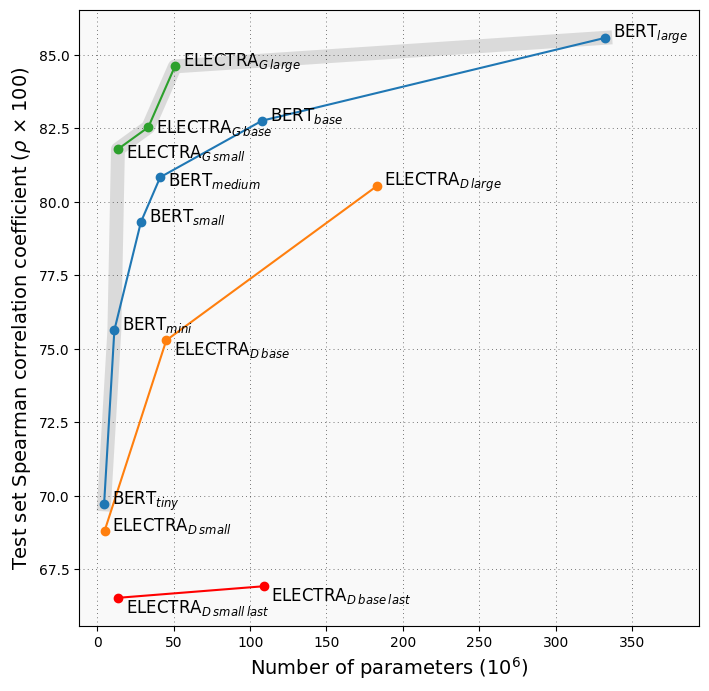

In [24]:
from transformers import AutoModel
from tqdm import tqdm
import torch

models = [
    [
        ("bert-base-cased", 13, "BERT$_{base}$"),
        ("bert-large-cased", 25, "BERT$_{large}$"),
        ("google-bert_uncased_L-8_H-512_A-8", 9, "BERT$_{medium}$", (0, -0.3)),
        ("google-bert_uncased_L-4_H-512_A-8", 5,"BERT$_{small}$"),
        ("google-bert_uncased_L-2_H-128_A-2", 3,"BERT$_{tiny}$"),
        ("google-bert_uncased_L-4_H-256_A-4", 5,"BERT$_{mini}$"),
    ],
    [
        ("google-electra-small-discriminator", 13, "ELECTRA$_{D\:small}$"),
        ("google-electra-base-discriminator", 13, "ELECTRA$_{D\:base}$", (0, -0.5)),
        ("google-electra-large-discriminator", 25, "ELECTRA$_{D\:large}$"),
    ],
    [
        ("google-electra-small-generator", 13, "ELECTRA$_{G\:small}$", (0, -0.3)),
        ("google-electra-base-generator", 13, "ELECTRA$_{G\:base}$", (0, -0.2)),
        ("google-electra-large-generator", 25, "ELECTRA$_{G\:large}$"),

    ]
]


def count_params(model, i):
    x = torch.tensor(0.)
    for p in model.embeddings.parameters():
        x += torch.prod(torch.tensor(p.shape))
    if i > 0:
        for p in model.encoder.layer[:i].parameters():
            x += torch.prod(torch.tensor(p.shape))
    return x/10**6

all_scores_params = []
plt.figure(figsize=(8, 8))
ax = plt.gca()
for f in models:
    val_spearman, spearman, parameters = [], [], []
     
    if "discriminator" in f[0][0]:
        disc_spearman, disc_params = [], []
   
    for m in tqdm(f):
        val_means, means = [], []
        name = m[0] if "google" not in m[0] else m[0].replace("google-", "google/")
        model = AutoModel.from_pretrained(name)
        for i in range(m[1]):
            params = count_params(model, i)
            res = json.load(open(f"../output/{m[0]}/mean/{i}_to_{i+1}/test_results.json"))
            means.append([res["mean_cosine_spearman_test"]*100, params])
            res = json.load(open(f"../output/{m[0]}/mean/{i}_to_{i+1}/val_results.json"))
            val_means.append(res["mean_cosine_spearman_val"])

        if "discriminator" in m[0] and "large" not in m[0]:
            x, y = means[-1]
            disc_spearman.append(x)
            disc_params.append(y)
            split_idx = m[2].rfind('}')
            plt.annotate(m[2][:split_idx] + "\: last" + m[2][split_idx:], (y+5, x-0.5), fontsize=12)
            
        
        indices = np.argsort(val_means)
        #print(np.array(means), "\n\n", np.array([val_means]))
        #print(
        #    f"""
        #    {m[2]} - percentage between {indices[-1]} and {m[1]-1} state - {-1*(means[indices[-1]][1] - means[-1][1]) / means[-1][1]}
        #)
        means = np.array(means)[indices]
        x, y = means[::-1, :][0]
        all_scores_params.append([x, y])
        spearman.append(x)
        parameters.append(y)
        x_delta, y_delta = m[3] if len(m) == 4 else (0, 0)
        plt.annotate(m[2], (y+5+x_delta, x-0.002+y_delta), fontsize=12)

    means_ = np.array([spearman, parameters]).T
    means_.sort(axis=0)
    
    if "discriminator" in m[0]:
        plt.plot(disc_params,disc_spearman, "-o", c="r")

    plt.plot(means_[:,1], means_[:,0], "-o")
    plt.xlim([plt.xlim()[0], plt.xlim()[1]+15])
    plt.xlabel("Number of parameters ($10^6$)", fontsize=14)
    plt.ylabel("Test set Spearman correlation coefficient ($\\rho$ $\\times$ 100)", fontsize=14)
ax.set_facecolor("#F9F9F9")
ax.grid(color='black', linestyle=(0, (1, 5)), linewidth=0.5)


def pareto_front(points):
    mask = np.ones(len(points), dtype=bool)
    for i, (x, y) in enumerate(points):
        for j, (x_other, y_other) in enumerate(points):
            if i != j:
                if x_other <= x and y_other >= y:
                    mask[i] = False
                    break 
    return mask

all_scores_params = np.array(all_scores_params)
all_scores_params[:,[0,1]] = all_scores_params[:,[1,0]]
pareto = all_scores_params[pareto_front(all_scores_params)].tolist()
pareto = np.array(sorted(pareto, key=lambda x: (x[0], x[1])))
plt.plot(pareto[:,0], pareto[:, 1], "-o", color="gray", alpha=0.25, linewidth=10, zorder=0)


plt.savefig("./plots/pareto.pdf", format="pdf", bbox_inches="tight", dpi=300)

In [5]:
def plot_func(models, ylim_spearman=[0.53, 0.87], legend_loc="best"):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    for x in models:
        m = x[0]
        pool = x[1]
        c = x[2]
        json_names_labels = x[3]
        for p in pool:
            for (name, label) in json_names_labels:
                spearman = []
                std_spearman = []
                for i in range(c):
                    res = json.load(open(f"../output/{m}/{p}/{i}_to_{i+1}/{name}.json"))

                    std_1 = res["stdev_cosine_spearman_test"] * 100
                    mean_1 = res["mean_cosine_spearman_test"] * 100
                    std_spearman.append((mean_1-std_1, mean_1+std_1))
                    spearman.append(mean_1)

                ax.plot(spearman, "-o", label=label)
                if "unsupervised" not in name:
                    ax.fill_between(
                        np.array(list(range(c))), 
                        np.array(std_spearman)[:,0], 
                        np.array(std_spearman)[:,1], 
                        alpha=0.15
                    )
                ax.set_xlabel("Layer index", fontsize=14)
                ax.set_ylabel("Test set Spearman correlation coefficient ($\\rho$ $\\times$ 100)", fontsize=14)
                ax.legend(loc=legend_loc, fontsize=14)
                if ylim_spearman is not None:
                    ax.set_ylim(ylim_spearman)
                ax.set_facecolor("#F9F9F9")
                ax.grid(color='black', linestyle=(0, (1, 5)), linewidth=0.5)
                

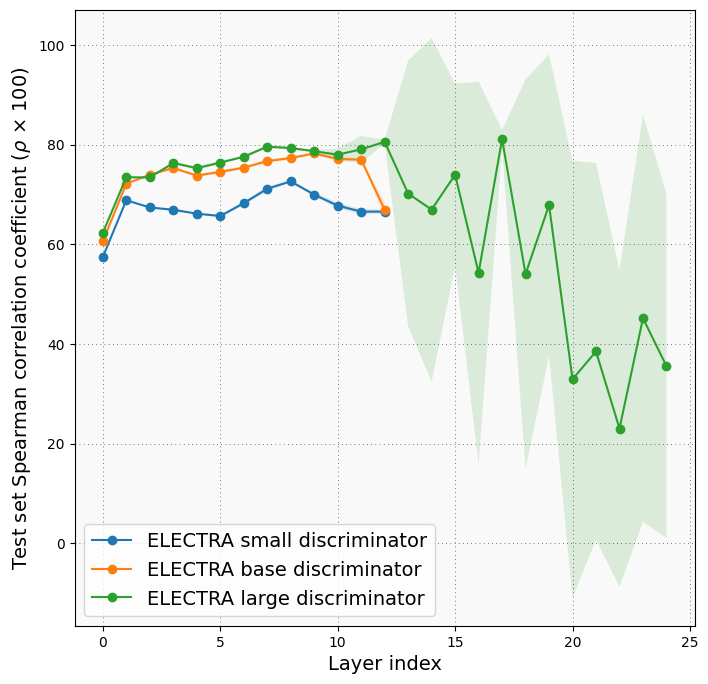

In [6]:
models = [
    ("google-electra-small-discriminator", ["mean"], 13,
         [
            ("test_results", "ELECTRA small discriminator"),
         ]
    ),
    ("google-electra-base-discriminator", ["mean"], 13,
         [
            ("test_results", "ELECTRA base discriminator"),
         ]
    ),
    ("google-electra-large-discriminator", ["mean"], 25,
        [
            ("test_results", "ELECTRA large discriminator"),
         ]
    )
]

plot_func(models, ylim_spearman=None, legend_loc="lower left")
plt.savefig("./plots/discriminator.pdf", format="pdf", bbox_inches="tight", dpi=300)

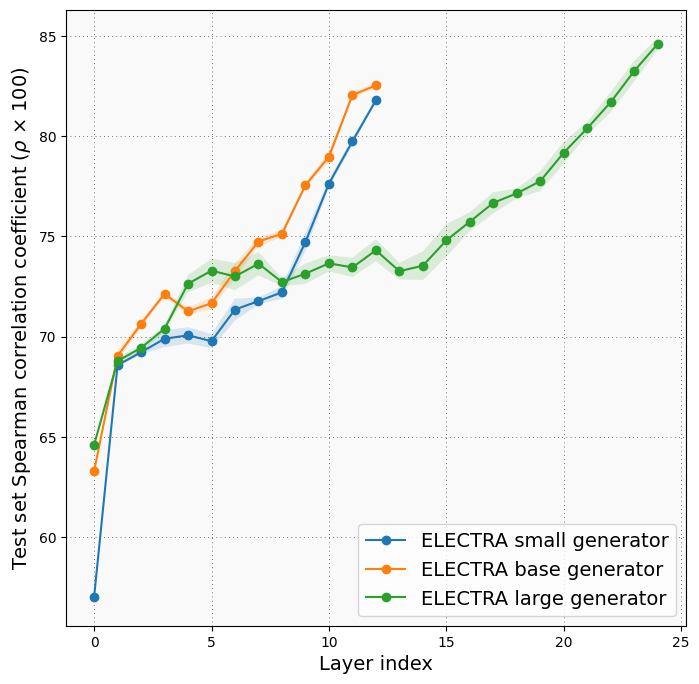

In [7]:
models = [
    ("google-electra-small-generator", ["mean"], 13,
         [
            ("test_results", "ELECTRA small generator"),
         ]
    ),
    ("google-electra-base-generator", ["mean"], 13,
         [
            ("test_results", "ELECTRA base generator"),
         ]
    ),
    ("google-electra-large-generator", ["mean"], 25,
        [
            ("test_results", "ELECTRA large generator"),
         ]
    )
]

plot_func(models, ylim_spearman=None)
plt.savefig("./plots/generator.pdf", format="pdf", bbox_inches="tight", dpi=300)

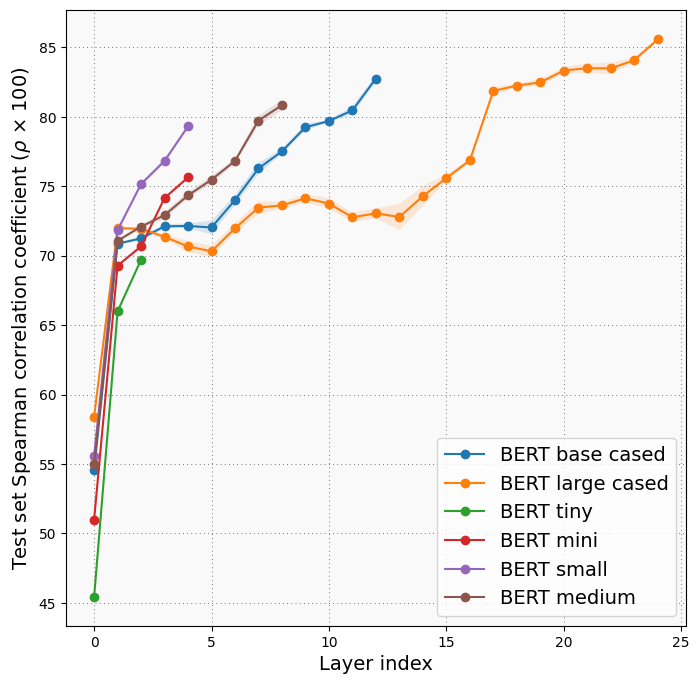

In [8]:
models = [
    
    ("bert-base-cased", ["mean"], 13,
         [
            ("test_results", "BERT base cased"),
         ]
    ),
    ("bert-large-cased", ["mean"], 25,
         [
            ("test_results", "BERT large cased"),
         ]
    ),
    ("google-bert_uncased_L-2_H-128_A-2", ["mean"], 3,
        [
            ("test_results", "BERT tiny"),
         ]
    ),
    ("google-bert_uncased_L-4_H-256_A-4", ["mean"], 5,
        [
            ("test_results", "BERT mini"),
         ]
    ),
    ("google-bert_uncased_L-4_H-512_A-8", ["mean"], 5,
        [
            ("test_results", "BERT small"),
         ]
    ),
    ("google-bert_uncased_L-8_H-512_A-8", ["mean"], 9,
        [
            ("test_results", "BERT medium"),
         ]
    ),
]

plot_func(models, ylim_spearman=None)
plt.savefig("./plots/bert.pdf", format="pdf", bbox_inches="tight", dpi=300)

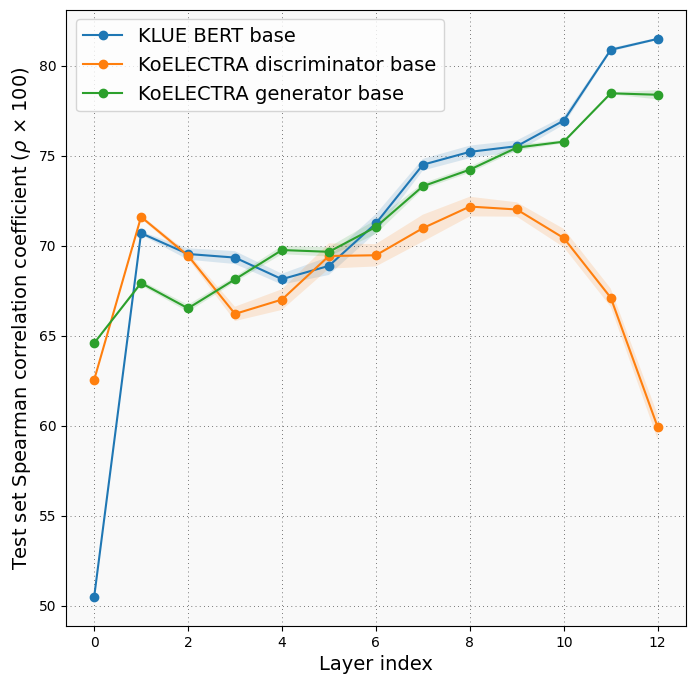

In [9]:
models = [
    ("klue-bert-base", ["mean"], 13, 
        [
            ("test_results_kor_sts", "KLUE BERT base"),
         ]
    ),
    ("monologg-koelectra-base-v3-discriminator", ["mean"], 13,
        [
            ("test_results_kor_sts", "KoELECTRA discriminator base"),
         ]
    ),
    ("monologg-koelectra-base-v3-generator", ["mean"], 13, 
        [
            ("test_results_kor_sts", "KoELECTRA generator base"),
         ]
    ),
]

plot_func(models, ylim_spearman=None)
plt.savefig("./plots/korean.pdf", format="pdf", bbox_inches="tight", dpi=300)

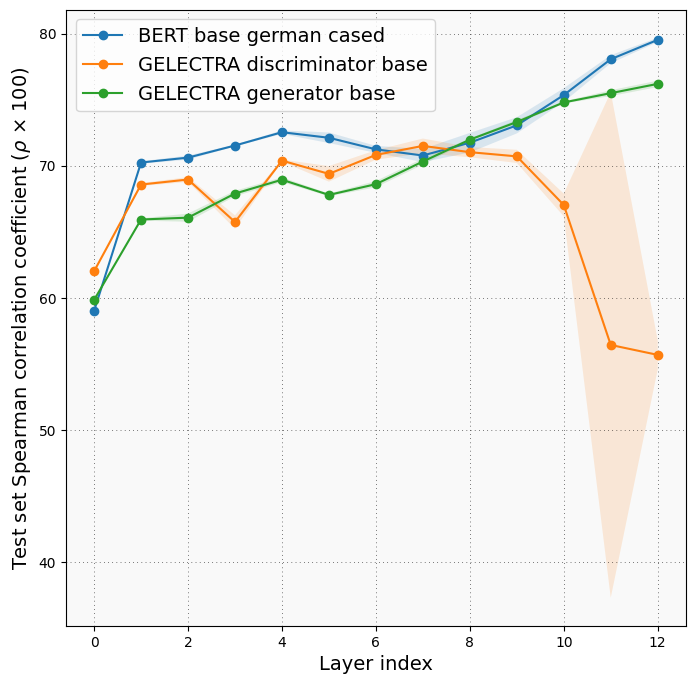

In [10]:
models = [
    ("bert-base-german-cased", ["mean"], 13,
        [
            ("test_results_german_sts", "BERT base german cased"),
         ]
    ),
    ("deepset-gelectra-base", ["mean"], 13, 
        [
            ("test_results_german_sts", "GELECTRA discriminator base"),
         ]
    ),
    ("deepset-gelectra-base-generator", ["mean"], 13, 
        [
            ("test_results_german_sts", "GELECTRA generator base"),
         ]
    ),
]

plot_func(models, ylim_spearman=None)
plt.savefig("./plots/german.pdf", format="pdf", bbox_inches="tight", dpi=300)

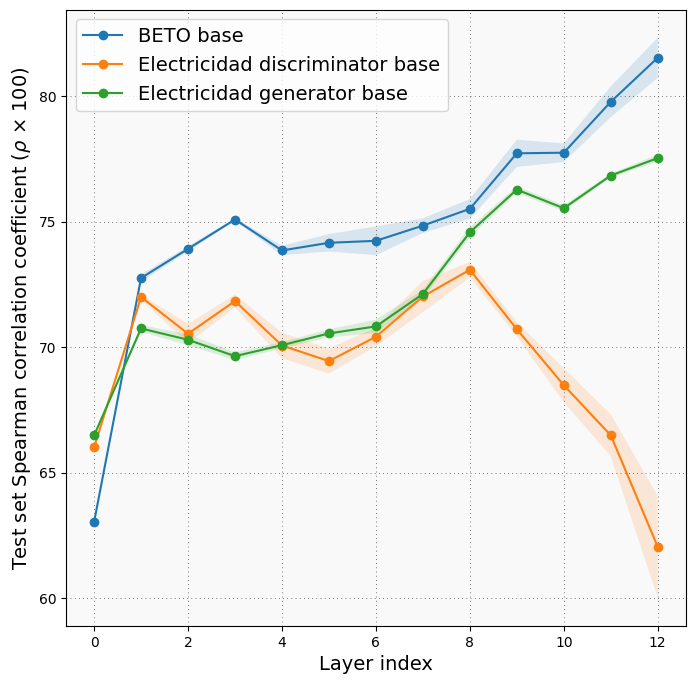

In [11]:
models = [
    ("dccuchile-bert-base-spanish-wwm-cased", ["mean"], 13, 
        [
            ("test_results_spanish_sts", "BETO base"),
         ]
    ),
    ("mrm8488-electricidad-base-discriminator", ["mean"], 13, 
        [
            ("test_results_spanish_sts", "Electricidad discriminator base"),
         ]
    ),
    ("mrm8488-electricidad-base-generator", ["mean"], 13, 
        [
            ("test_results_spanish_sts", "Electricidad generator base"),
         ]
    ),
]

plot_func(models, ylim_spearman=None)
plt.savefig("./plots/spanish.pdf", format="pdf", bbox_inches="tight", dpi=300)